# Notebook for exploring the Chinese-English Dictionary

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load lexical units table
colnames = ['id', 'simplified', 'traditional', 'pinyin', 
            'english', 'grammar', 'concept_cn', 'concept_en', 
            'domain_cn', 'domain_en', 'subdomain_cn', 'subdomain_en',
            'image', 'mp3', 'notes', 'headword']
types = {'id': np.uint32, 'simplified': np.object, 'traditional': np.object, 
        'pinyin': np.object, 'english': np.object, 'grammar': np.object,
        'concept_cn': np.object, 'concept_en': np.object,
        'domain_cn': np.object, 'domain_en': np.object, 'subdomain_cn': np.object,
         'subdomain_en': np.object, 'image': np.object, 'mp3': np.object,
         'notes': np.object, 'headword': np.uint32}
df = pd.read_table('../data/words.txt', names=colnames, dtype=types)
print df['id'].count() # Number of lexical units

# Unique headwords
print len(df['headword'].unique())

# Example row
df[df.simplified == '佛']

45850
37291


,id,simplified,traditional,pinyin,english,grammar,concept_cn,concept_en,domain_cn,domain_en,subdomain_cn,subdomain_en,image,mp3,notes,headword
3617,3618,佛,\N,fó,Buddha / Awakened One,proper noun,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,"Sanskrit: buddha, Pali: buddha, Japanese: buts...",3618
3618,3619,佛,\N,fó,Buddhist / of Buddhism,adjective,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,As a modifier describing a concept that relate...,3618


In [3]:
# Counts for different parts of speech
df['grammar'].value_counts()

noun              17743
verb              10019
proper noun        9250
adjective          4006
phrase             1573
adverb              794
set phrase          726
measure word        306
pronoun             214
conjunction         196
phonetic            192
\N                  121
number              113
foreign             111
particle            102
preposition          97
onomatopoeia         70
interjection         55
ordinal              35
pattern              30
auxiliary verb       25
bound form           24
suffix               21
expression           10
prefix                9
radical               6
infix                 2
Name: grammar, dtype: int64

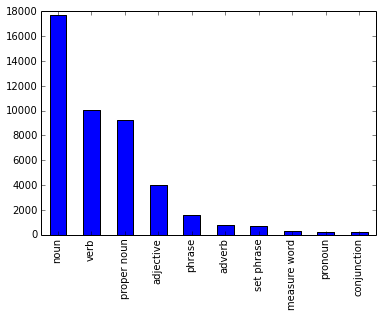

In [4]:
# Histogram for different parts of speech
df['grammar'].value_counts()[:10].plot(kind='bar')

In [5]:
# Counts for lexical units of different domains
df['domain_en'].value_counts()

Classical Chinese         8160
Buddhism                  5149
History                   2651
Actions                   1540
Condition                 1096
Places                     990
Geography                  876
Emotion                    797
Language                   792
Thought                    785
Health                     772
Quantity                   724
Information Technology     719
Time                       654
Characteristic             639
Food and Drink             621
Function Words             611
Idiom                      594
Form                       566
Art                        544
Linguistics                474
Names                      454
Religion                   411
Movement                   402
Ethics                     395
Work                       376
Position                   367
Architecture               366
Nature                     348
Law                        346
                          ... 
Computer Science            16
Chinese 

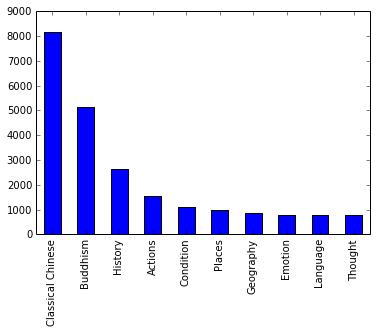

In [6]:
# Histogram for different domains
df['domain_en'].value_counts()[:10].plot(kind='bar')

In [7]:
# Words with no notes
df.ix[df.notes == '\N', :5].head()

,id,simplified,traditional,pinyin,english
269,270,收听,收聽,shōutīng,to listen to
279,280,听,聽,tīng,to listen
285,286,一月,\N,yīyuè,January / the First Month
286,287,二月,\N,èryuè,February / the Second Month
287,288,三月,\N,sānyuè,March / the Third Month


In [16]:
# Find simplified and pinyin from a traditional text string
luid = 45852
tradArr = ["根", "柢"]
english = [u"a plant root",
           "a foundation / a basis"
          ]
grammar = ["noun", 
           "noun"
          ]
concept = [u"\\N\t\\N",
           u"\\N\t\\N"
          ]
domain = [u"古文\tClassical Chinese", u"古文\tClassical Chinese"
         ]
subdomain = u"\\N\t\\N"
note = [u" ", 
        u""
       ]

# Generated
traditional = ""
simplified = ""
pinyin = ""
for t in tradArr:
  sDF = df[df.traditional == t]['simplified']
  tDF = df[df.traditional == t]['traditional']
  pDF = df[df.traditional == t]['pinyin']
  if sDF.count() > 0:
    simplified += sDF.iloc[0].decode('utf-8')
    traditional +=tDF.iloc[0].decode('utf-8')
    pinyin += pDF.iloc[0].decode('utf-8') + " "
  else:
    sDF = df[df.simplified == t]['simplified']
    tDF = df[df.simplified == t]['simplified']
    pDF = df[df.simplified == t]['pinyin']
    if sDF.count() > 0:
      simplified += sDF.iloc[0].decode('utf-8')
      traditional += sDF.iloc[0].decode('utf-8')
      pinyin += pDF.iloc[0].decode('utf-8') + " "
    else:
      print "%s not found" % t
pinyin.strip()
trad = traditional
if simplified == traditional:
  trad = "\\N"
pinyin = pinyin.replace(" ", "")
print simplified
print trad
print pinyin
print "English: %d" % len(english)
print "Grammar: %d" % len(grammar)
print "Concept: %d" % len(concept)
print "Domain: %d" % len(domain)
print "Note: %d" % len(note)

根柢
\N
gēndǐ
English: 2
Grammar: 2
Concept: 2
Domain: 2
Note: 2


In [17]:
# Input - 
#pinyin = u"tài" # override for variant pronounciations

# Modify references as needed
# Repeat this for each lexical unit. See abbreviations.html for the abbreviations.
#bscd = u"BCSD '%s'" % traditional
abc1 = u"ABC '%s' bf 1" % pinyin

ccd1 = u"CCD '%s' 4" % simplified

ced1 = u"CED '%s' 1" % simplified

fe1 = u"FE '%s' 1" % traditional
fe2 = u"FE '%s' 2" % traditional

ghc1 = u"GHC '%s' 1" % simplified

ghdc1 = u"GHDC '%s' 1" % simplified

#fgdb = u"FGDB '%s'" % traditional

k1 = u"Kroll '%s' 1" % traditional

hsk1 = u"GHDC '%s' 3" % simplified

ncced1 = u"NCCED '%s' 1" % simplified
#mw = u"MW 'upāya'"
# add more references as needed
refArr = [[fe1, ghdc1],
          [fe2]
         ]

# References
for i in range(len(english)):
  ref = u""
  for r in refArr[i]:
    if r != "":
      ref += r + "; "
  ref = re.sub("; $", "", ref)
  if ref != "":
    ref = u"(%s)" % ref

  notes = u"%s%s" % (note[i], ref)
  print u"%d\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t\\N\t\\N\t%s\t%d" % (
      luid, simplified, trad, pinyin, english[i], grammar[i], 
      concept[i], domain[i], subdomain, notes, luid)

45852	根柢	\N	gēndǐ	a plant root	noun	\N	\N	古文	Classical Chinese	\N	\N	\N	\N	 (FE '根柢' 1; GHDC '根柢' 1)	45852
45852	根柢	\N	gēndǐ	a foundation / a basis	noun	\N	\N	古文	Classical Chinese	\N	\N	\N	\N	(FE '根柢' 2)	45852
